# CAPSTONE PROJECT OVERVIEW

### Exploratory Data Analysis (EDA) - Kyphosis

- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset.
    - data available for public use on Kaggle.com from the following link: https://www.kaggle.com/datasets/abbasit/kyphosis-dataset?resource=download  
- Kyphosis is an abnormally excessive convex curvature of the spine. 
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery. 
    - INPUTS: 1. Age: in months, 2. Number: the number of vertebrae involved, 3. Start: the number of the first (topmost) vertebra operated on.
    - OUTPUTS: Kyphosis which represents a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
- Using the “kyphosis.csv" included in the course package, write a python script to perform the following tasks:
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods
    4. Plot the correlation matrix 
    5. Convert the age column datatype from int64 to float64
    6. Define a function that converts age from months to years 
    7. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 
    8. What are the features of the oldest and youngest child in this study?
    9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.    

In [1]:
# import dataset
import pandas as pd
kyphosis = pd.read_csv('kyphosis.csv')
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [2]:
# basic EDA 
kyphosis.head(6) # show first 6 rows

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16


In [3]:
kyphosis.tail(5)  # shows last 5 rows

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [4]:
kyphosis.info() # shows dataset info incl column names and nums, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
round(kyphosis.describe(), 2) # statistical summary

,Age,Number,Start
count,81.00,81.00,81.00
mean,83.65,4.05,11.49
std,58.10,1.62,4.88
min,1.00,2.00,1.00
25%,26.00,3.00,9.00
50%,87.00,4.00,13.00
75%,130.00,5.00,16.00
max,206.00,10.00,18.00


In [6]:
# average values for dataset
round(kyphosis.mean(numeric_only=True), 2)

Age       83.65
Number     4.05
Start     11.49
dtype: float64

In [7]:
#average age (in years)
avg_age = round((kyphosis['Age']/12).mean(), 2)
print("The average age is", avg_age, "years")

# min age(in years)
min_age = round((kyphosis['Age']/12).min(), 2)
print("The minimum age is", min_age, "years")

# max age (in years)
max_age = round((kyphosis['Age']/12).max(), 2)
print("The maximum age is", max_age, "years")

The average age is 6.97 years
The minimum age is 0.08 years
The maximum age is 17.17 years


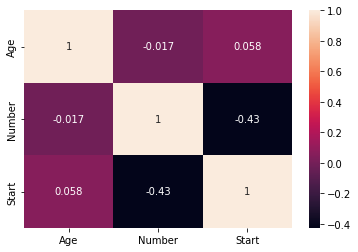

In [8]:
# plot the correlation matrix
## import pkgs for visual
import seaborn as sn
import matplotlib.pyplot as plt

kyph_matrix = kyphosis.corr()  ## create correlation matrix

# for visualizing matrix
sn.heatmap(kyph_matrix, annot=True)
plt.show()

In [9]:
# convert age column datatype from int64 to float64
kyphosis['Age'] = kyphosis['Age'].astype(float)
kyphosis['Age'].dtypes # confirm data type change

dtype('float64')

In [10]:
# apply function to "Age" column and add results into new column 
# "Age in years"
# define function for conversion
def month_to_years(m): 
    return m/12

# apply function to datastet and add new column
kyphosis['Age in years'] = round(kyphosis['Age'].apply(month_to_years), 2)
kyphosis

,Kyphosis,Age,Number,Start,Age in years
0,absent,71.0,3,5,5.92
1,absent,158.0,3,14,13.17
2,present,128.0,4,5,10.67
3,absent,2.0,5,1,0.17
4,absent,1.0,4,15,0.08
...,...,...,...,...,...
76,present,157.0,3,13,13.08
77,absent,26.0,7,13,2.17
78,absent,120.0,2,13,10.00
79,present,42.0,7,6,3.50


In [11]:
# What are the features of the oldest and youngest child in this study?
## get kyphosis state, age in mo., number and start for min/max ages

max_age = kyphosis[kyphosis["Age"] == kyphosis["Age"].max()]
print('Oldest child features: ', '\n', max_age, '\n')

min_age = kyphosis[kyphosis["Age"] == kyphosis["Age"].min()]
print('Youngest child features: ', '\n', min_age)

Oldest child features:  
    Kyphosis    Age  Number  Start  Age in years
73   absent  206.0       4     10         17.17 

Youngest child features:  
    Kyphosis  Age  Number  Start  Age in years
4    absent  1.0       4     15          0.08
5    absent  1.0       2     16          0.08
13   absent  1.0       4     12          0.08
15   absent  1.0       3     16          0.08
36   absent  1.0       3      9          0.08


In [12]:
# Scale the raw Age column (in months) using standardization
#NOTE: standardization will have a mean of 0 and std of 1, but any upper/lower values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kyphosis['Age'] = scaler.fit_transform(kyphosis['Age'].values.reshape(-1,1))

In [13]:
round(kyphosis['Age'].describe(), 2)  # check standardization of mean=0 and std= 1

count    81.00
mean      0.00
std       1.01
min      -1.43
25%      -1.00
50%       0.06
75%       0.80
max       2.12
Name: Age, dtype: float64

In [14]:
round(kyphosis.describe(),2)  # view with rest of data

,Age,Number,Start,Age in years
count,81.00,81.00,81.00,81.00
mean,0.00,4.05,11.49,6.97
std,1.01,1.62,4.88,4.84
min,-1.43,2.00,1.00,0.08
25%,-1.00,3.00,9.00,2.17
50%,0.06,4.00,13.00,7.25
75%,0.80,5.00,16.00,10.83
max,2.12,10.00,18.00,17.17


In [15]:
# Scale the raw Age column (in months) using normalization
#NOTE: normalization will always range from 0 to 1
from sklearn.preprocessing import MinMaxScaler

kyphosis['Age'].values
scaler = MinMaxScaler()
kyphosis['Age'] = scaler.fit_transform(kyphosis['Age'].values.reshape(-1,1))

In [16]:
round(kyphosis['Age'].describe(), 2) #confirm normalization range of min=0 and max=1

count    81.00
mean      0.40
std       0.28
min       0.00
25%       0.12
50%       0.42
75%       0.63
max       1.00
Name: Age, dtype: float64

In [17]:
round(kyphosis.describe(),2) #view with rest of data

,Age,Number,Start,Age in years
count,81.00,81.00,81.00,81.00
mean,0.40,4.05,11.49,6.97
std,0.28,1.62,4.88,4.84
min,0.00,2.00,1.00,0.08
25%,0.12,3.00,9.00,2.17
50%,0.42,4.00,13.00,7.25
75%,0.63,5.00,16.00,10.83
max,1.00,10.00,18.00,17.17


In [18]:
# perform sanity check
kyphosis.isnull().sum() #check for null values, #NOTE: 0 = none

Kyphosis        0
Age             0
Number          0
Start           0
Age in years    0
dtype: int64